In [ ]:
from model import Unet
import torch 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json
import random
import torch.nn.functional as F

In [ ]:
model = Unet()
ckpt = "ckpt_best_loss.pth"
states = torch.load(ckpt)
model.load_state_dict(states)

In [61]:
img_path = 'ex1.png'

In [62]:
img = cv2.imread(img_path).astype(np.float32) /255.0


In [63]:
tensored = torch.from_numpy(img)[None, :, : ,:]

In [64]:
model.eval()
with torch.inference_mode():
    segmented = F.sigmoid(model(tensored)).squeeze().numpy()

In [65]:
segmented

array([[0.16463806, 0.10327196, 0.10083476, ..., 0.09762171, 0.09961267,
        0.16558146],
       [0.10438267, 0.05078289, 0.04879054, ..., 0.04772457, 0.04771195,
        0.10203148],
       [0.10056388, 0.04758899, 0.04792129, ..., 0.04512813, 0.04663613,
        0.09889387],
       ...,
       [0.10227132, 0.0501874 , 0.04908469, ..., 0.04919375, 0.04885399,
        0.10377639],
       [0.10549634, 0.05081771, 0.04993111, ..., 0.04893595, 0.05115398,
        0.10623308],
       [0.17273062, 0.10677879, 0.10335269, ..., 0.10407228, 0.10604428,
        0.16715896]], dtype=float32)

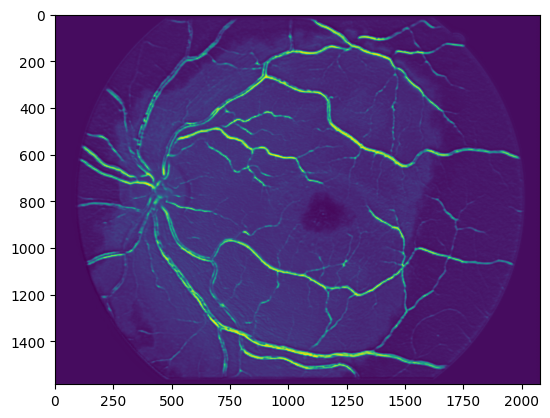

In [66]:
fig, ax = plt.subplots()

ax.imshow(segmented)

In [67]:
cv2.imwrite('ex1_segmented.png', segmented*255)

True

In [ ]:
def segment(example):
    img_path = example['image_path']
    mask_path = example['mask_path']
    img = cv2.imread(img_path).astype(np.float32)
    mask = cv2.imread(mask_path,0)
    with torch.inference_mode():
        segmented = model(tensored)
    segmented = segmented.argmax(dim=1).squeeze().numpy().astype(np.uint8)
    iou = IOU(segmented,mask)
    return iou

In [ ]:
mask.shape

In [ ]:
len(np.where(mask==masked)[0])

In [ ]:
iou = 0
for example in test_set[0:100]:
    iou += segment(example)
print(iou/100)

In [ ]:
fp = np.ndarray.flatten(masked)
fm = np.ndarray.flatten(mask)

In [ ]:
sim = np.where(fp == fm)[0]

In [43]:
def IOU (predicted, mask, num_classes=5):
    count = 0
    true_class_num = 0 
    for i in range(num_classes):
        if i not in np.unique(predicted) and i not in np.unique(mask):
            continue
        else:
            true_class_num +=1
            tp = ((masked == i) & (mask == i)).sum()
            fp = ((masked == i) & (mask != i)).sum()
            fn = ((masked != i) & (mask != i)).sum()
            cc = tp / (tp + fp + fn)
            count += cc 
    return count / true_class_num